In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
import warnings

In [41]:
df=pd.read_csv('data/stud.csv')

In [42]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
x=df.drop(columns=['math_score'],axis=1)

In [44]:
y=df['math_score']

In [45]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [46]:
#create Column Transformers with 3 types of transformers
num_features= x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preproccessor= ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer, cat_features),
        ("StandardScaler",numeric_transformer, num_features)
    ]
)

In [47]:
x=preproccessor.fit_transform(x)

#### Create an Evaluate Function to give all metrics after model training

In [56]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mae, rmse, r2_square

In [51]:
x.shape

(1000, 19)

In [54]:
#saperate dataset into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [64]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Catboosting Regressor":CatBoostRegressor(verbose=False)
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(x_train,y_train) #Train Model

    #make Predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("-Root Mean Squared Error: {}".format(model_train_rmse))
    print("-Mean Absolute Error:{}".format(model_train_mae))
    print("- R2 score:{}".format(model_train_r2))

    print("-----------------------------------------")

    print('Model performance for Testing set')
    print("-Root Mean Squared Error: {}".format(model_test_rmse))
    print("-Mean Absolute Error:{}".format(model_test_mae))
    print("- R2 score:{}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("\n")



Linear Regression
Model performance for Training set
-Root Mean Squared Error: 5.3270901441872445
-Mean Absolute Error:4.2694140625
- R2 score:0.8741263878535156
-----------------------------------------
Model performance for Testing set
-Root Mean Squared Error: 5.418561217155575
-Mean Absolute Error:4.21953125
- R2 score:0.8793416671431122


Lasso
Model performance for Training set
-Root Mean Squared Error: 6.593815587795566
-Mean Absolute Error:5.206302661246526
- R2 score:0.8071462015863456
-----------------------------------------
Model performance for Testing set
-Root Mean Squared Error: 6.519694535667419
-Mean Absolute Error:5.157881810347763
- R2 score:0.8253197323627853


Ridge
Model performance for Training set
-Root Mean Squared Error: 5.323324922741654
-Mean Absolute Error:4.264987823725981
- R2 score:0.8743042615212909
-----------------------------------------
Model performance for Testing set
-Root Mean Squared Error: 5.39038701693564
-Mean Absolute Error:4.2111006880142

### Results

In [66]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name', "R2_score"]).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.879342
5,Random Forest Regressor,0.852387
6,Catboosting Regressor,0.851632
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.733663


## Lineaar Regression

In [67]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train, y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is ",score,"%")

Accuracy of the model is  87.93416671431122 %


Text(0, 0.5, 'predicted')

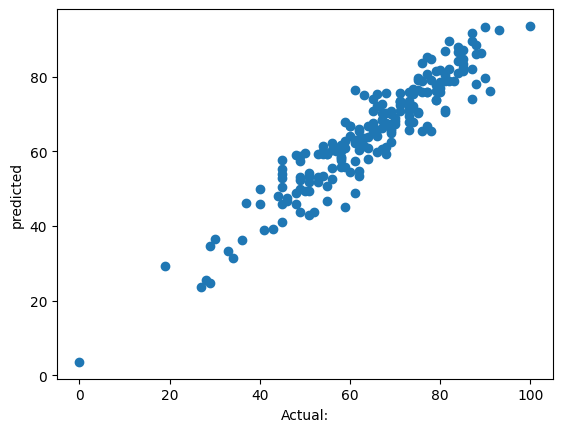

In [68]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual:")
plt.ylabel("predicted")

<Axes: xlabel='math_score'>

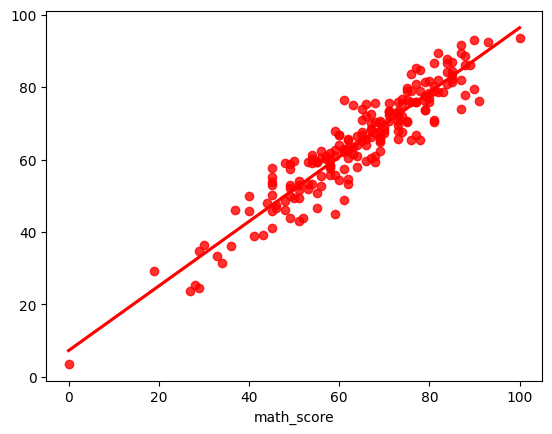

In [69]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")

### Difference between Actual and Preddicted Values

In [70]:
pred_df=pd.DataFrame({'Actual value':y_test,'Predicted Value':y_pred,"Difference":y_test-y_pred})
pred_df

,Actual value,Predicted Value,Difference
521,91,76.21875,14.78125
737,53,59.21875,-6.21875
740,80,76.90625,3.09375
660,74,76.71875,-2.71875
411,84,87.90625,-3.90625
...,...,...,...
408,52,43.81250,8.18750
332,62,62.40625,-0.40625
208,74,67.75000,6.25000
613,65,66.81250,-1.81250
